In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
recent_mob=pd.read_csv("LFB Mobilisation data 2021 - 2024.csv", sep=';', low_memory=False)

In [3]:
recent_mob.head()

,IncidentNumber,CalYear,BoroughName,WardName,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000004-01012021,2021,HARINGEY,Muswell Hill,0,5769249,A321,1,01.01.2021 00:06,01.01.2021 00:07,01.01.2021 00:09,48.0,133.0,181,01.01.2021 00:57,NaN,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,000005-01012021,2021,REDBRIDGE,MONKHAMS,0,5769250,F351,1,01.01.2021 00:07,01.01.2021 00:09,01.01.2021 00:11,114.0,136.0,250,01.01.2021 00:18,NaN,F35,Woodford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,000006-01012021,2021,BARKING AND DAGENHAM,Village,0,5769251,F412,1,01.01.2021 00:08,01.01.2021 00:10,01.01.2021 00:14,131.0,245.0,376,01.01.2021 00:24,NaN,F41,Dagenham,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
3,000007-01012021,2021,WANDSWORTH,West Hill,0,5769252,H331,1,01.01.2021 00:12,01.01.2021 00:13,01.01.2021 00:19,53.0,356.0,409,01.01.2021 00:40,NaN,H33,Wandsworth,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures
4,000007-01012021,2021,WANDSWORTH,West Hill,0,5769253,G351,2,01.01.2021 00:12,01.01.2021 00:13,01.01.2021 00:19,69.0,376.0,445,01.01.2021 00:29,NaN,G35,Fulham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN


In [4]:
middle_mob=pd.read_csv("LFB Mobilisation data from 2015 - 2020.csv", sep=';', low_memory=False)

In [5]:
middle_mob.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,1151,2015,0,4436381,H262,1,01.01.2015 00:02,01.01.2015 00:03,01.01.2015 00:07,79.0,203.0,282,01.01.2015 00:35,01.01.2015 00:43,H26,Addington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,1151,2015,0,4436380,H261,2,01.01.2015 00:02,01.01.2015 00:03,01.01.2015 00:07,74.0,211.0,285,01.01.2015 00:33,01.01.2015 00:38,H26,Addington,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,4151,2015,0,4436383,A352,1,01.01.2015 00:03,01.01.2015 00:03,01.01.2015 00:09,44.0,360.0,404,01.01.2015 00:15,01.01.2015 00:27,A35,Enfield,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
3,8151,2015,0,4436385,G251,1,01.01.2015 00:04,01.01.2015 00:06,01.01.2015 00:09,76.0,223.0,299,01.01.2015 00:44,01.01.2015 00:50,G25,Ealing,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,10151,2015,0,4436390,H291,1,01.01.2015 00:06,01.01.2015 00:11,01.01.2015 00:13,249.0,152.0,401,01.01.2015 00:20,01.01.2015 00:25,H29,Purley,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised


In [6]:
middle_mob.dtypes

IncidentNumber               object
CalYear                       int64
HourOfCall                    int64
ResourceMobilisationId        int64
Resource_Code                object
PerformanceReporting         object
DateAndTimeMobilised         object
DateAndTimeMobile            object
DateAndTimeArrived           object
TurnoutTimeSeconds          float64
TravelTimeSeconds           float64
AttendanceTimeSeconds         int64
DateAndTimeLeft              object
DateAndTimeReturned          object
DeployedFromStation_Code     object
DeployedFromStation_Name     object
DeployedFromLocation         object
PumpOrder                     int64
PlusCode_Code                object
PlusCode_Description         object
DelayCodeId                 float64
DelayCode_Description        object
dtype: object

In [7]:
old_mob=pd.read_csv("LFB Mobilisation data from January 2009 - 2014.csv", sep=';', low_memory=False)

In [8]:
old_mob.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,01.01.2009 00:02,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,01.01.2009 00:02,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,01.01.2009 00:04,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,01.01.2009 00:04,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,01.01.2009 00:06,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


In [9]:
old_mob.describe()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId
count,9.017880e+05,901788.000000,901788.000000,9.017880e+05,883636.000000,883631.000000,901788.000000,901788.000000,228294.000000
mean,9.733895e+07,2011.318029,13.556419,3.495803e+06,88.020254,263.883826,349.679681,1.382739,10.507850
std,6.109136e+07,1.701681,6.285624,1.117746e+06,49.291701,154.377236,157.714144,0.610024,2.271681
min,1.092000e+03,2009.000000,0.000000,3.842600e+04,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.350814e+07,2010.000000,9.000000,3.447315e+06,59.000000,161.000000,246.000000,1.000000,9.000000
50%,9.474712e+07,2011.000000,14.000000,3.772272e+06,81.000000,233.000000,319.000000,1.000000,12.000000
75%,1.464721e+08,2013.000000,19.000000,4.090109e+06,107.000000,330.000000,418.000000,2.000000,12.000000
max,2.351381e+08,2014.000000,23.000000,4.436379e+06,1150.000000,1198.000000,1200.000000,9.000000,13.000000


In [10]:
middle_mob.describe()

,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId
count,883641.000000,883641.00000,8.836410e+05,876339.000000,876254.000000,883641.000000,883641.000000,215751.000000
mean,2017.571914,13.48361,5.092030e+06,75.161089,278.215617,351.786454,1.470578,10.339781
std,1.685468,6.30284,3.907146e+05,40.632820,148.924267,152.232386,0.786622,2.251729
min,2015.000000,0.00000,4.436380e+06,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2016.000000,9.00000,4.752067e+06,53.000000,180.000000,253.000000,1.000000,9.000000
50%,2018.000000,14.00000,5.081349e+06,70.000000,253.000000,327.000000,1.000000,12.000000
75%,2019.000000,19.00000,5.433747e+06,90.000000,345.000000,421.000000,2.000000,12.000000
max,2020.000000,23.00000,5.769247e+06,1185.000000,1195.000000,1200.000000,11.000000,13.000000


In [11]:
recent_mob.describe()

,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeReturned,PumpOrder,DelayCodeId
count,711371.000000,711371.000000,7.113710e+05,708229.000000,708224.000000,711371.000000,0.0,711371.000000,178633.000000
mean,2022.552000,13.338250,6.294298e+06,73.997050,284.916795,357.817285,NaN,1.541522,10.660236
std,1.100334,6.413402,3.074487e+05,40.785109,150.160868,152.846202,NaN,0.923259,2.003375
min,2021.000000,0.000000,5.769249e+06,0.000000,0.000000,0.000000,NaN,1.000000,3.000000
25%,2022.000000,9.000000,6.026386e+06,51.000000,184.000000,257.000000,NaN,1.000000,9.000000
50%,2023.000000,14.000000,6.293543e+06,70.000000,261.000000,335.000000,NaN,1.000000,12.000000
75%,2024.000000,19.000000,6.557780e+06,91.000000,358.000000,432.000000,NaN,2.000000,12.000000
max,2024.000000,23.000000,6.837332e+06,1192.000000,1180.000000,1200.000000,NaN,13.000000,13.000000


In [12]:
all_mobs=pd.concat([old_mob, middle_mob, recent_mob], axis=0)

In [13]:
all_mobs.head(4)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName
0,235138081,2009,0,38426,H271,1,01.01.2009 00:02,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN
1,235138081,2009,0,38427,H212,2,01.01.2009 00:02,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN
2,2091,2009,0,38429,A341,1,01.01.2009 00:04,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN
3,3091,2009,0,38430,G232,1,01.01.2009 00:04,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN


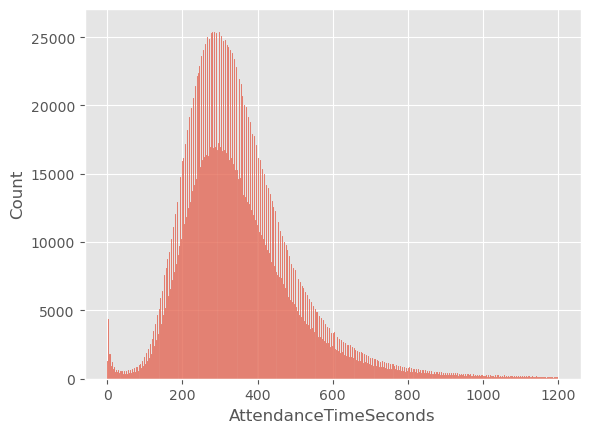

In [14]:
sns.histplot(all_mobs['AttendanceTimeSeconds'])
plt.show(sns)

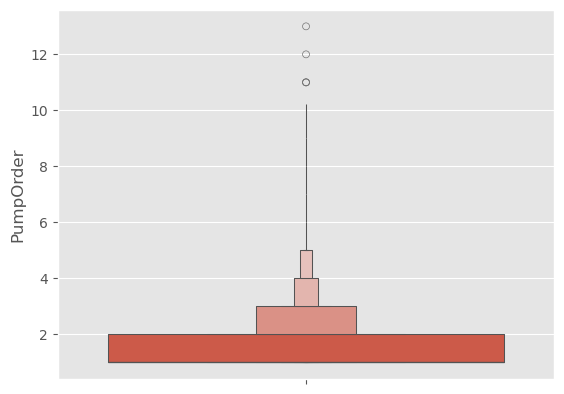

In [15]:
sns.boxenplot(all_mobs['PumpOrder'])
plt.show(sns)

In [16]:
all_mobs.infer_datetime_format=True
all_mobs['DateAndTimeMobilised'] = pd.to_datetime(all_mobs['DateAndTimeMobilised'], format='mixed', errors='coerce')
all_mobs['Weekday'] = all_mobs['DateAndTimeMobilised'].dt.strftime('%A') #get weekday
all_mobs["Month"] = pd.to_datetime(all_mobs['DateAndTimeMobilised']).dt.month
all_mobs["Day"] = pd.to_datetime(all_mobs['DateAndTimeMobilised']).dt.day
all_mobs.head(5)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1


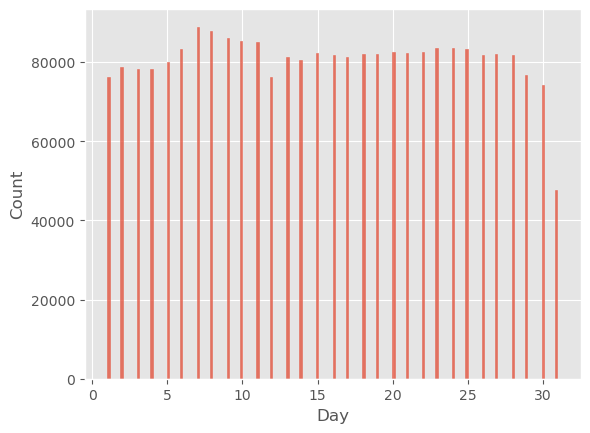

In [17]:
sns.histplot(all_mobs['Day'])
plt.show(sns)

In [18]:
all_mobs['DeployedFromStation_Name'].nunique()

126

In [19]:
all_mobs['DeployedFromStation_Name'].value_counts()

DeployedFromStation_Name
Soho                80015
Paddington          57084
Lambeth             48232
Hammersmith         47514
North Kensington    45593
                    ...  
Essex                   2
Buckinghamshire         2
Staines                 1
Watford                 1
Cheshunt                1
Name: count, Length: 126, dtype: int64

In [20]:
all_mobs['DeployedFromStation_Name'].unique()

array(['Battersea', 'Clapham', 'Edmonton', 'Hillingdon', 'Holloway',
       'Kentish Town', 'East Greenwich', 'Heston', 'Clerkenwell',
       'Euston', 'Peckham', 'Feltham', 'Homerton', 'Dowgate', 'Enfield',
       'Beckenham', 'Mitcham', 'North Kensington', 'Paddington', 'Soho',
       'Plumstead', 'Plaistow', 'East Ham', 'Old Kent Road', 'Southwark',
       'Brixton', 'Tooting', 'Hainault', 'Poplar', 'West Norwood',
       'Leyton', 'Walthamstow', 'Greenwich', 'Islington', 'Croydon',
       'Norbury', 'Kingston', 'Barnet', 'Deptford', 'Hornsey', 'Bexley',
       'New Malden', 'West Hampstead', 'Eltham', 'Lee Green', 'Sidcup',
       'Dagenham', 'Stratford', 'Bethnal Green', 'Southgate', 'Addington',
       'Hendon', 'Ilford', 'Hayes', 'Stanmore', 'Wembley', 'Kensington',
       'Wandsworth', 'Chiswick', 'Stoke Newington', 'Purley',
       'Twickenham', 'Tottenham', 'Hammersmith', 'Barking', 'Belsize',
       'Woolwich', 'Erith', 'Lambeth', 'New Cross', 'Romford', 'Ruislip',
       'S

In [21]:
all_mobs_Clerkenwell = all_mobs[all_mobs['DeployedFromStation_Name']=='Clerkenwell']
all_mobs_Clerkenwell.info()
all_mobs_Clerkenwell_idx=all_mobs_Clerkenwell.reset_index()
all_mobs_Clerkenwell_idx.head()
print(all_mobs_Clerkenwell_idx['WardName'].nunique())
print(all_mobs_Clerkenwell_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 11 to 777078
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            9977 non-null   object        
 1   CalYear                   9977 non-null   int64         
 2   HourOfCall                9977 non-null   int64         
 3   ResourceMobilisationId    9977 non-null   int64         
 4   Resource_Code             9977 non-null   object        
 5   PerformanceReporting      9977 non-null   object        
 6   DateAndTimeMobilised      9977 non-null   datetime64[ns]
 7   DateAndTimeMobile         9840 non-null   object        
 8   DateAndTimeArrived        9977 non-null   object        
 9   TurnoutTimeSeconds        9838 non-null   float64       
 10  TravelTimeSeconds         9839 non-null   float64       
 11  AttendanceTimeSeconds     9977 non-null   int64         
 12  DateAndTimeLeft       

In [22]:
all_mobs_Silvertown = all_mobs[all_mobs['DeployedFromStation_Name']=='Silvertown']
all_mobs_Silvertown.info()
all_mobs_Silvertown_idx=all_mobs_Silvertown.reset_index()
all_mobs_Silvertown_idx.head()
print(all_mobs_Silvertown_idx['WardName'].nunique())
print(all_mobs_Silvertown_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 422 to 776870
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            2250 non-null   object        
 1   CalYear                   2250 non-null   int64         
 2   HourOfCall                2250 non-null   int64         
 3   ResourceMobilisationId    2250 non-null   int64         
 4   Resource_Code             2250 non-null   object        
 5   PerformanceReporting      2250 non-null   object        
 6   DateAndTimeMobilised      2250 non-null   datetime64[ns]
 7   DateAndTimeMobile         2189 non-null   object        
 8   DateAndTimeArrived        2250 non-null   object        
 9   TurnoutTimeSeconds        2189 non-null   float64       
 10  TravelTimeSeconds         2189 non-null   float64       
 11  AttendanceTimeSeconds     2250 non-null   int64         
 12  DateAndTimeLeft      

In [23]:
all_mobs_Kingsland = all_mobs[all_mobs['DeployedFromStation_Name']=='Kingsland']
all_mobs_Kingsland.info()
all_mobs_Kingsland_idx=all_mobs_Kingsland.reset_index()
all_mobs_Kingsland_idx.head()
print(all_mobs_Kingsland_idx['WardName'].nunique())
print(all_mobs_Kingsland_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6753 entries, 724 to 776980
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            6753 non-null   object        
 1   CalYear                   6753 non-null   int64         
 2   HourOfCall                6753 non-null   int64         
 3   ResourceMobilisationId    6753 non-null   int64         
 4   Resource_Code             6753 non-null   object        
 5   PerformanceReporting      6753 non-null   object        
 6   DateAndTimeMobilised      6753 non-null   datetime64[ns]
 7   DateAndTimeMobile         6527 non-null   object        
 8   DateAndTimeArrived        6753 non-null   object        
 9   TurnoutTimeSeconds        6524 non-null   float64       
 10  TravelTimeSeconds         6526 non-null   float64       
 11  AttendanceTimeSeconds     6753 non-null   int64         
 12  DateAndTimeLeft      

In [24]:
all_mobs_Bow = all_mobs[all_mobs['DeployedFromStation_Name']=='Bow']
all_mobs_Bow.info()
all_mobs_Bow_idx=all_mobs_Bow.reset_index()
all_mobs_Bow_idx.head()
print(all_mobs_Bow_idx['WardName'].nunique())
print(all_mobs_Bow_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6880 entries, 745 to 777082
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            6880 non-null   object        
 1   CalYear                   6880 non-null   int64         
 2   HourOfCall                6880 non-null   int64         
 3   ResourceMobilisationId    6880 non-null   int64         
 4   Resource_Code             6880 non-null   object        
 5   PerformanceReporting      6880 non-null   object        
 6   DateAndTimeMobilised      6880 non-null   datetime64[ns]
 7   DateAndTimeMobile         6735 non-null   object        
 8   DateAndTimeArrived        6880 non-null   object        
 9   TurnoutTimeSeconds        6735 non-null   float64       
 10  TravelTimeSeconds         6735 non-null   float64       
 11  AttendanceTimeSeconds     6880 non-null   int64         
 12  DateAndTimeLeft      

In [25]:
all_mobs_Downham = all_mobs[all_mobs['DeployedFromStation_Name']=='Downham']
all_mobs_Downham.info()
all_mobs_Downham_idx=all_mobs_Downham.reset_index()
all_mobs_Downham_idx.head()
print(all_mobs_Downham_idx['WardName'].nunique())
print(all_mobs_Downham_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4016 entries, 869 to 777079
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            4016 non-null   object        
 1   CalYear                   4016 non-null   int64         
 2   HourOfCall                4016 non-null   int64         
 3   ResourceMobilisationId    4016 non-null   int64         
 4   Resource_Code             4016 non-null   object        
 5   PerformanceReporting      4016 non-null   object        
 6   DateAndTimeMobilised      4016 non-null   datetime64[ns]
 7   DateAndTimeMobile         3940 non-null   object        
 8   DateAndTimeArrived        4016 non-null   object        
 9   TurnoutTimeSeconds        3940 non-null   float64       
 10  TravelTimeSeconds         3940 non-null   float64       
 11  AttendanceTimeSeconds     4016 non-null   int64         
 12  DateAndTimeLeft      

In [26]:
all_mobs_Dartford = all_mobs[all_mobs['DeployedFromStation_Name']=='Dartford']
all_mobs_Dartford.info()
all_mobs_Dartford_idx=all_mobs_Dartford.reset_index()
all_mobs_Dartford_idx.head()
print(all_mobs_Dartford_idx['WardName'].nunique())
print(all_mobs_Dartford_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 729551 to 382514
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            4 non-null      object        
 1   CalYear                   4 non-null      int64         
 2   HourOfCall                4 non-null      int64         
 3   ResourceMobilisationId    4 non-null      int64         
 4   Resource_Code             4 non-null      object        
 5   PerformanceReporting      4 non-null      object        
 6   DateAndTimeMobilised      4 non-null      datetime64[ns]
 7   DateAndTimeMobile         3 non-null      object        
 8   DateAndTimeArrived        4 non-null      object        
 9   TurnoutTimeSeconds        3 non-null      float64       
 10  TravelTimeSeconds         3 non-null      float64       
 11  AttendanceTimeSeconds     4 non-null      int64         
 12  DateAndTimeLeft      

In [27]:
all_mobs_Kent = all_mobs[all_mobs['DeployedFromStation_Name']=='Kent']
all_mobs_Kent.info()
all_mobs_Kent_idx=all_mobs_Kent.reset_index()
all_mobs_Kent_idx.head()
print(all_mobs_Kent_idx['WardName'].nunique())
print(all_mobs_Kent_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 653923 to 288802
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            2 non-null      object        
 1   CalYear                   2 non-null      int64         
 2   HourOfCall                2 non-null      int64         
 3   ResourceMobilisationId    2 non-null      int64         
 4   Resource_Code             2 non-null      object        
 5   PerformanceReporting      2 non-null      object        
 6   DateAndTimeMobilised      2 non-null      datetime64[ns]
 7   DateAndTimeMobile         1 non-null      object        
 8   DateAndTimeArrived        2 non-null      object        
 9   TurnoutTimeSeconds        1 non-null      float64       
 10  TravelTimeSeconds         1 non-null      float64       
 11  AttendanceTimeSeconds     2 non-null      int64         
 12  DateAndTimeLeft      

In [28]:
all_mobs_Essex = all_mobs[all_mobs['DeployedFromStation_Name']=='Essex']
all_mobs_Essex.info()
all_mobs_Essex_idx=all_mobs_Kent.reset_index()
all_mobs_Essex_idx.head()
print(all_mobs_Essex_idx['WardName'].nunique())
print(all_mobs_Essex_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 363144 to 405288
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            2 non-null      object        
 1   CalYear                   2 non-null      int64         
 2   HourOfCall                2 non-null      int64         
 3   ResourceMobilisationId    2 non-null      int64         
 4   Resource_Code             2 non-null      object        
 5   PerformanceReporting      2 non-null      object        
 6   DateAndTimeMobilised      2 non-null      datetime64[ns]
 7   DateAndTimeMobile         2 non-null      object        
 8   DateAndTimeArrived        2 non-null      object        
 9   TurnoutTimeSeconds        2 non-null      float64       
 10  TravelTimeSeconds         2 non-null      float64       
 11  AttendanceTimeSeconds     2 non-null      int64         
 12  DateAndTimeLeft      

In [34]:
all_mobs_Buckinghamshire = all_mobs[all_mobs['DeployedFromStation_Name']=='Buckinghamshire']
all_mobs_Buckinghamshire.info()
all_mobs_Buckinghamshire_idx=all_mobs_Buckinghamshire.reset_index()
all_mobs_Buckinghamshire_idx.head()
print(all_mobs_Buckinghamshire_idx['Postcode_district'].nunique())
print(all_mobs_Buckinghamshire_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 455281 to 553571
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            2 non-null      object        
 1   CalYear                   2 non-null      int64         
 2   HourOfCall                2 non-null      int64         
 3   ResourceMobilisationId    2 non-null      int64         
 4   Resource_Code             2 non-null      object        
 5   PerformanceReporting      2 non-null      object        
 6   DateAndTimeMobilised      2 non-null      datetime64[ns]
 7   DateAndTimeMobile         2 non-null      object        
 8   DateAndTimeArrived        2 non-null      object        
 9   TurnoutTimeSeconds        2 non-null      float64       
 10  TravelTimeSeconds         2 non-null      float64       
 11  AttendanceTimeSeconds     2 non-null      int64         
 12  DateAndTimeLeft      

KeyError: 'Postcode_district'

In [36]:
all_mobs_Surrey = all_mobs[all_mobs['DeployedFromStation_Name']=='Surrey']
all_mobs_Surrey.info()
all_mobs_Surrey_idx=all_mobs_Surrey.reset_index()
all_mobs_Surrey_idx.head()
print(all_mobs_Surrey_idx['WardName'].nunique())
print(all_mobs_Surrey_idx['WardName'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 327042 to 679513
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            6 non-null      object        
 1   CalYear                   6 non-null      int64         
 2   HourOfCall                6 non-null      int64         
 3   ResourceMobilisationId    6 non-null      int64         
 4   Resource_Code             6 non-null      object        
 5   PerformanceReporting      6 non-null      object        
 6   DateAndTimeMobilised      6 non-null      datetime64[ns]
 7   DateAndTimeMobile         5 non-null      object        
 8   DateAndTimeArrived        6 non-null      object        
 9   TurnoutTimeSeconds        5 non-null      float64       
 10  TravelTimeSeconds         5 non-null      float64       
 11  AttendanceTimeSeconds     6 non-null      int64         
 12  DateAndTimeLeft      

In [38]:
all_mobs.describe()

,CalYear,HourOfCall,ResourceMobilisationId,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId,Month,Day
count,2.496800e+06,2.496800e+06,2.496800e+06,2496800,2.468204e+06,2.468109e+06,2.496800e+06,2.496800e+06,622678.000000,2.496800e+06,2.496800e+06
mean,2.016732e+03,1.346849e+01,4.858051e+06,2017-03-27 05:01:15.184049920,7.943076e+01,2.750075e+02,3.527438e+02,1.459065e+00,10.493332,6.546491e+00,1.577515e+01
min,2.009000e+03,0.000000e+00,3.842600e+04,2009-01-01 00:02:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000,1.000000e+00,1.000000e+00
25%,2.012000e+03,9.000000e+00,4.017701e+06,2012-11-26 05:24:45,5.400000e+01,1.730000e+02,2.510000e+02,1.000000e+00,9.000000,4.000000e+00,8.000000e+00
50%,2.017000e+03,1.400000e+01,4.938696e+06,2017-06-25 22:35:30,7.300000e+01,2.480000e+02,3.270000e+02,1.000000e+00,12.000000,7.000000e+00,1.600000e+01
75%,2.021000e+03,1.900000e+01,5.891177e+06,2021-07-24 21:01:00,9.600000e+01,3.440000e+02,4.230000e+02,2.000000e+00,12.000000,9.000000e+00,2.300000e+01
max,2.024000e+03,2.300000e+01,6.837332e+06,2024-12-11 23:52:00,1.192000e+03,1.198000e+03,1.200000e+03,1.300000e+01,13.000000,1.200000e+01,3.100000e+01
std,4.783626e+00,6.328962e+00,1.345190e+06,NaN,4.443762e+01,1.515018e+02,1.544433e+02,7.748187e-01,2.194637,3.403215e+00,8.753295e+00


In [40]:
all_mobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496800 entries, 0 to 711370
Data columns (total 27 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   IncidentNumber            object        
 1   CalYear                   int64         
 2   HourOfCall                int64         
 3   ResourceMobilisationId    int64         
 4   Resource_Code             object        
 5   PerformanceReporting      object        
 6   DateAndTimeMobilised      datetime64[ns]
 7   DateAndTimeMobile         object        
 8   DateAndTimeArrived        object        
 9   TurnoutTimeSeconds        float64       
 10  TravelTimeSeconds         float64       
 11  AttendanceTimeSeconds     int64         
 12  DateAndTimeLeft           object        
 13  DateAndTimeReturned       object        
 14  DeployedFromStation_Code  object        
 15  DeployedFromStation_Name  object        
 16  DeployedFromLocation      object        
 17  PumpOrder     

In [42]:
print(all_mobs.isna().sum())

IncidentNumber                    0
CalYear                           0
HourOfCall                        0
ResourceMobilisationId            0
Resource_Code                     0
PerformanceReporting              0
DateAndTimeMobilised              0
DateAndTimeMobile             28459
DateAndTimeArrived                0
TurnoutTimeSeconds            28596
TravelTimeSeconds             28691
AttendanceTimeSeconds             0
DateAndTimeLeft               46461
DateAndTimeReturned         1523642
DeployedFromStation_Code         27
DeployedFromStation_Name         27
DeployedFromLocation           1200
PumpOrder                         0
PlusCode_Code                     0
PlusCode_Description              0
DelayCodeId                 1874122
DelayCode_Description       1874122
BoroughName                 1788097
WardName                    1788813
Weekday                           0
Month                             0
Day                               0
dtype: int64


In [43]:
all_mobs['DelayCode_Description'].value_counts()
#This column contains roughly 75% of NaNs. Should we keep it anyways? If we decide to keep it, we would still have around 600,000 datapoints.

DelayCode_Description
Not held up                           372430
Traffic, roadworks, etc               121922
Traffic calming measures               39165
Address incomplete/wrong               36932
Arrived but held up - Other reason     19592
Mob/Radio problems when mobilised       9985
On outside duty when mobilised          9426
Weather conditions                      7267
Appliance/Equipment defect              3155
At drills when mobilised                2804
Name: count, dtype: int64

In [46]:
all_mobs_nona=all_mobs.dropna(axis=0, how='any')

In [47]:
all_mobs_nona.isna().sum()
print(all_mobs_nona.info())
#If we drop all NaNs, we end up with an empty dataframe...

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IncidentNumber            0 non-null      object        
 1   CalYear                   0 non-null      int64         
 2   HourOfCall                0 non-null      int64         
 3   ResourceMobilisationId    0 non-null      int64         
 4   Resource_Code             0 non-null      object        
 5   PerformanceReporting      0 non-null      object        
 6   DateAndTimeMobilised      0 non-null      datetime64[ns]
 7   DateAndTimeMobile         0 non-null      object        
 8   DateAndTimeArrived        0 non-null      object        
 9   TurnoutTimeSeconds        0 non-null      float64       
 10  TravelTimeSeconds         0 non-null      float64       
 11  AttendanceTimeSeconds     0 non-null      int64         
 12  DateAndTimeLeft           0 non-null   

In [50]:
all_mobs['TravelTimeMinutes']=all_mobs['TravelTimeSeconds']/60

In [52]:
all_mobs.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.483333
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,2.616667
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.700000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.983333


In [56]:
all_mobs['BoroughName'].value_counts()

BoroughName
WESTMINSTER               52535
TOWER HAMLETS             34154
CAMDEN                    31921
SOUTHWARK                 31674
CROYDON                   31499
LAMBETH                   30680
HACKNEY                   28136
LEWISHAM                  27371
BARNET                    24883
KENSINGTON AND CHELSEA    24660
ISLINGTON                 23952
EALING                    23625
WANDSWORTH                23555
NEWHAM                    23159
BRENT                     22591
HAMMERSMITH AND FULHAM    22003
GREENWICH                 21800
HILLINGDON                21704
HARINGEY                  20151
ENFIELD                   19656
BROMLEY                   18473
HOUNSLOW                  17889
WALTHAM FOREST            17739
REDBRIDGE                 14876
HAVERING                  13619
BARKING AND DAGENHAM      13407
BEXLEY                    13290
SUTTON                    12126
HARROW                    11655
MERTON                    10994
RICHMOND UPON THAMES      10

In [58]:
print(all_mobs.loc[all_mobs['IncidentNumber']== '061470-18042024'])

         IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
585385  061470-18042024     2024          17                 6635540   

       Resource_Code PerformanceReporting DateAndTimeMobilised  \
585385          F321                    1  2024-04-18 16:14:00   

       DateAndTimeMobile DateAndTimeArrived  TurnoutTimeSeconds  \
585385  18.04.2024 16:16   18.04.2024 16:34               126.0   

        TravelTimeSeconds  AttendanceTimeSeconds   DateAndTimeLeft  \
585385             1074.0                   1200  18.04.2024 18:21   

       DateAndTimeReturned DeployedFromStation_Code DeployedFromStation_Name  \
585385                 NaN                      F32          Stoke Newington   

       DeployedFromLocation  PumpOrder PlusCode_Code  PlusCode_Description  \
585385         Home Station          1       Initial  Initial Mobilisation   

        DelayCodeId DelayCode_Description BoroughName  WardName   Weekday  \
585385         12.0           Not held up     HACKN

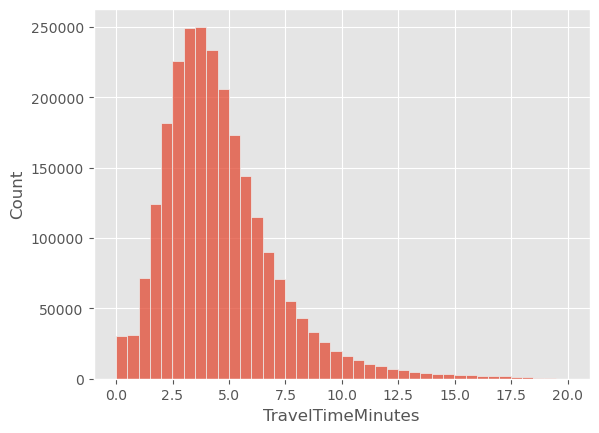

In [60]:
sns.histplot(data=all_mobs['TravelTimeMinutes'], binwidth = 0.5)
plt.show(sns)

In [62]:
#Slicing of dataframe according to Delay code description
roadworks=all_mobs[all_mobs['DelayCode_Description']=='Traffic, roadworks, etc']
calming=all_mobs[all_mobs['DelayCode_Description']=='Traffic calming measures']
wrong_address=all_mobs[all_mobs['DelayCode_Description']=='Address incomplete/wrong']
smooth=all_mobs[all_mobs['DelayCode_Description']=='Not held up']
radio=all_mobs[all_mobs['DelayCode_Description']=='Mob/Radio problems when mobilised']
outside_duty=all_mobs[all_mobs['DelayCode_Description']=='on outside duty when mobilised']
weather=all_mobs[all_mobs['DelayCode_Description']=='Weather conditions']
equipment=all_mobs[all_mobs['DelayCode_Description']=='Appliance/Equipment defect']
drills=all_mobs[all_mobs['DelayCode_Description']=='At drills when mobilised']

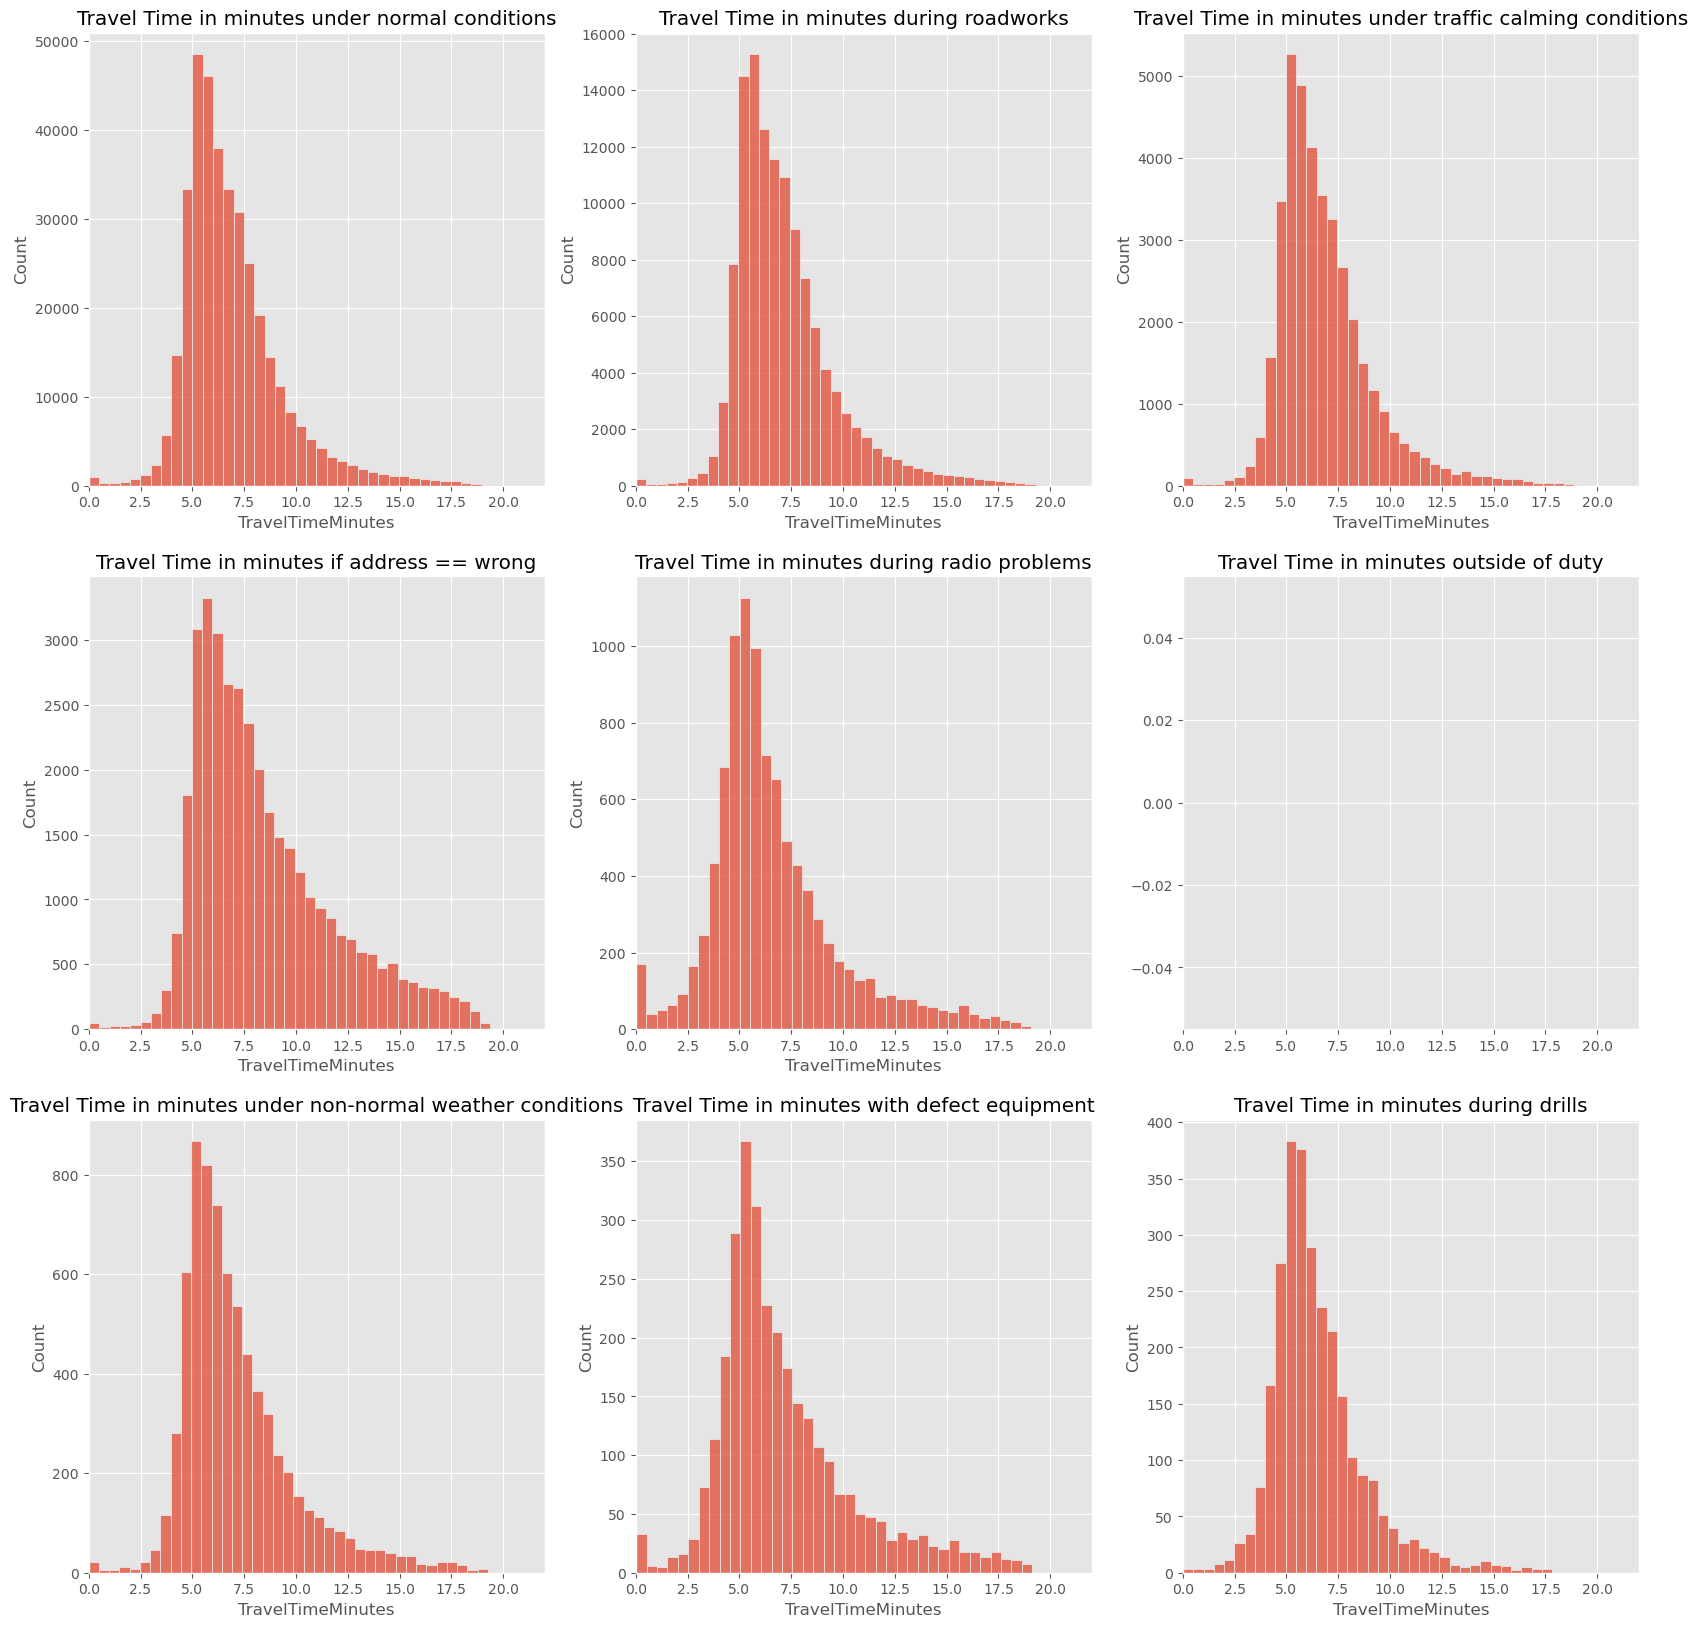

In [64]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.histplot(data=smooth['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes under normal conditions")
plt.subplot(332)
sns.histplot(data=roadworks['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes during roadworks")
plt.subplot(333)
sns.histplot(data=calming['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes under traffic calming conditions")
plt.subplot(334)
sns.histplot(data=wrong_address['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes if address == wrong")
plt.subplot(335)
sns.histplot(data=radio['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes during radio problems")
plt.subplot(336)
sns.histplot(data=outside_duty['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes outside of duty")
plt.subplot(337)
sns.histplot(data=weather['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes under non-normal weather conditions")
plt.subplot(338)
sns.histplot(data=equipment['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes with defect equipment")
plt.subplot(339)
sns.histplot(data=drills['TravelTimeMinutes'], binwidth = 0.5)
plt.xlim(0,22)
plt.title("Travel Time in minutes during drills")
plt.show(sns)

In [66]:
print(smooth['TravelTimeMinutes'].mean())
print(roadworks['TravelTimeMinutes'].mean())
print(calming['TravelTimeMinutes'].mean())
print(wrong_address['TravelTimeMinutes'].mean())
print(radio['TravelTimeMinutes'].mean())
print(outside_duty['TravelTimeMinutes'].mean())
print(weather['TravelTimeMinutes'].mean())
print(equipment['TravelTimeMinutes'].mean())
print(drills['TravelTimeMinutes'].mean())
#We tentatively suggest that wrong address information and equipment problems and emergency calls during drills prolong the travel time.

6.91424513849134
7.16639394612501
6.8400020524398375
8.45677056441751
6.608654212074035
nan
7.170325821466427
7.183214824391294
6.491669652454317


In [68]:
all_mobs.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.483333
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,2.616667
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.700000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.983333


In [70]:
all_mobs['TurnoutTimeMinutes']=all_mobs['TurnoutTimeSeconds']/60

In [72]:
all_mobs.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes,TurnoutTimeMinutes
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,NaN,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.483333,4.216667
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,2.616667,2.516667
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.700000,1.800000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.983333,1.900000


In [74]:
#Slicing of dataframe according to Delay code description
roadworks=all_mobs[all_mobs['DelayCode_Description']=='Traffic, roadworks, etc']
calming=all_mobs[all_mobs['DelayCode_Description']=='Traffic calming measures']
wrong_address=all_mobs[all_mobs['DelayCode_Description']=='Address incomplete/wrong']
smooth=all_mobs[all_mobs['DelayCode_Description']=='Not held up']
radio=all_mobs[all_mobs['DelayCode_Description']=='Mob/Radio problems when mobilised']
outside_duty=all_mobs[all_mobs['DelayCode_Description']=='on outside duty when mobilised']
weather=all_mobs[all_mobs['DelayCode_Description']=='Weather conditions']
equipment=all_mobs[all_mobs['DelayCode_Description']=='Appliance/Equipment defect']
drills=all_mobs[all_mobs['DelayCode_Description']=='At drills when mobilised']

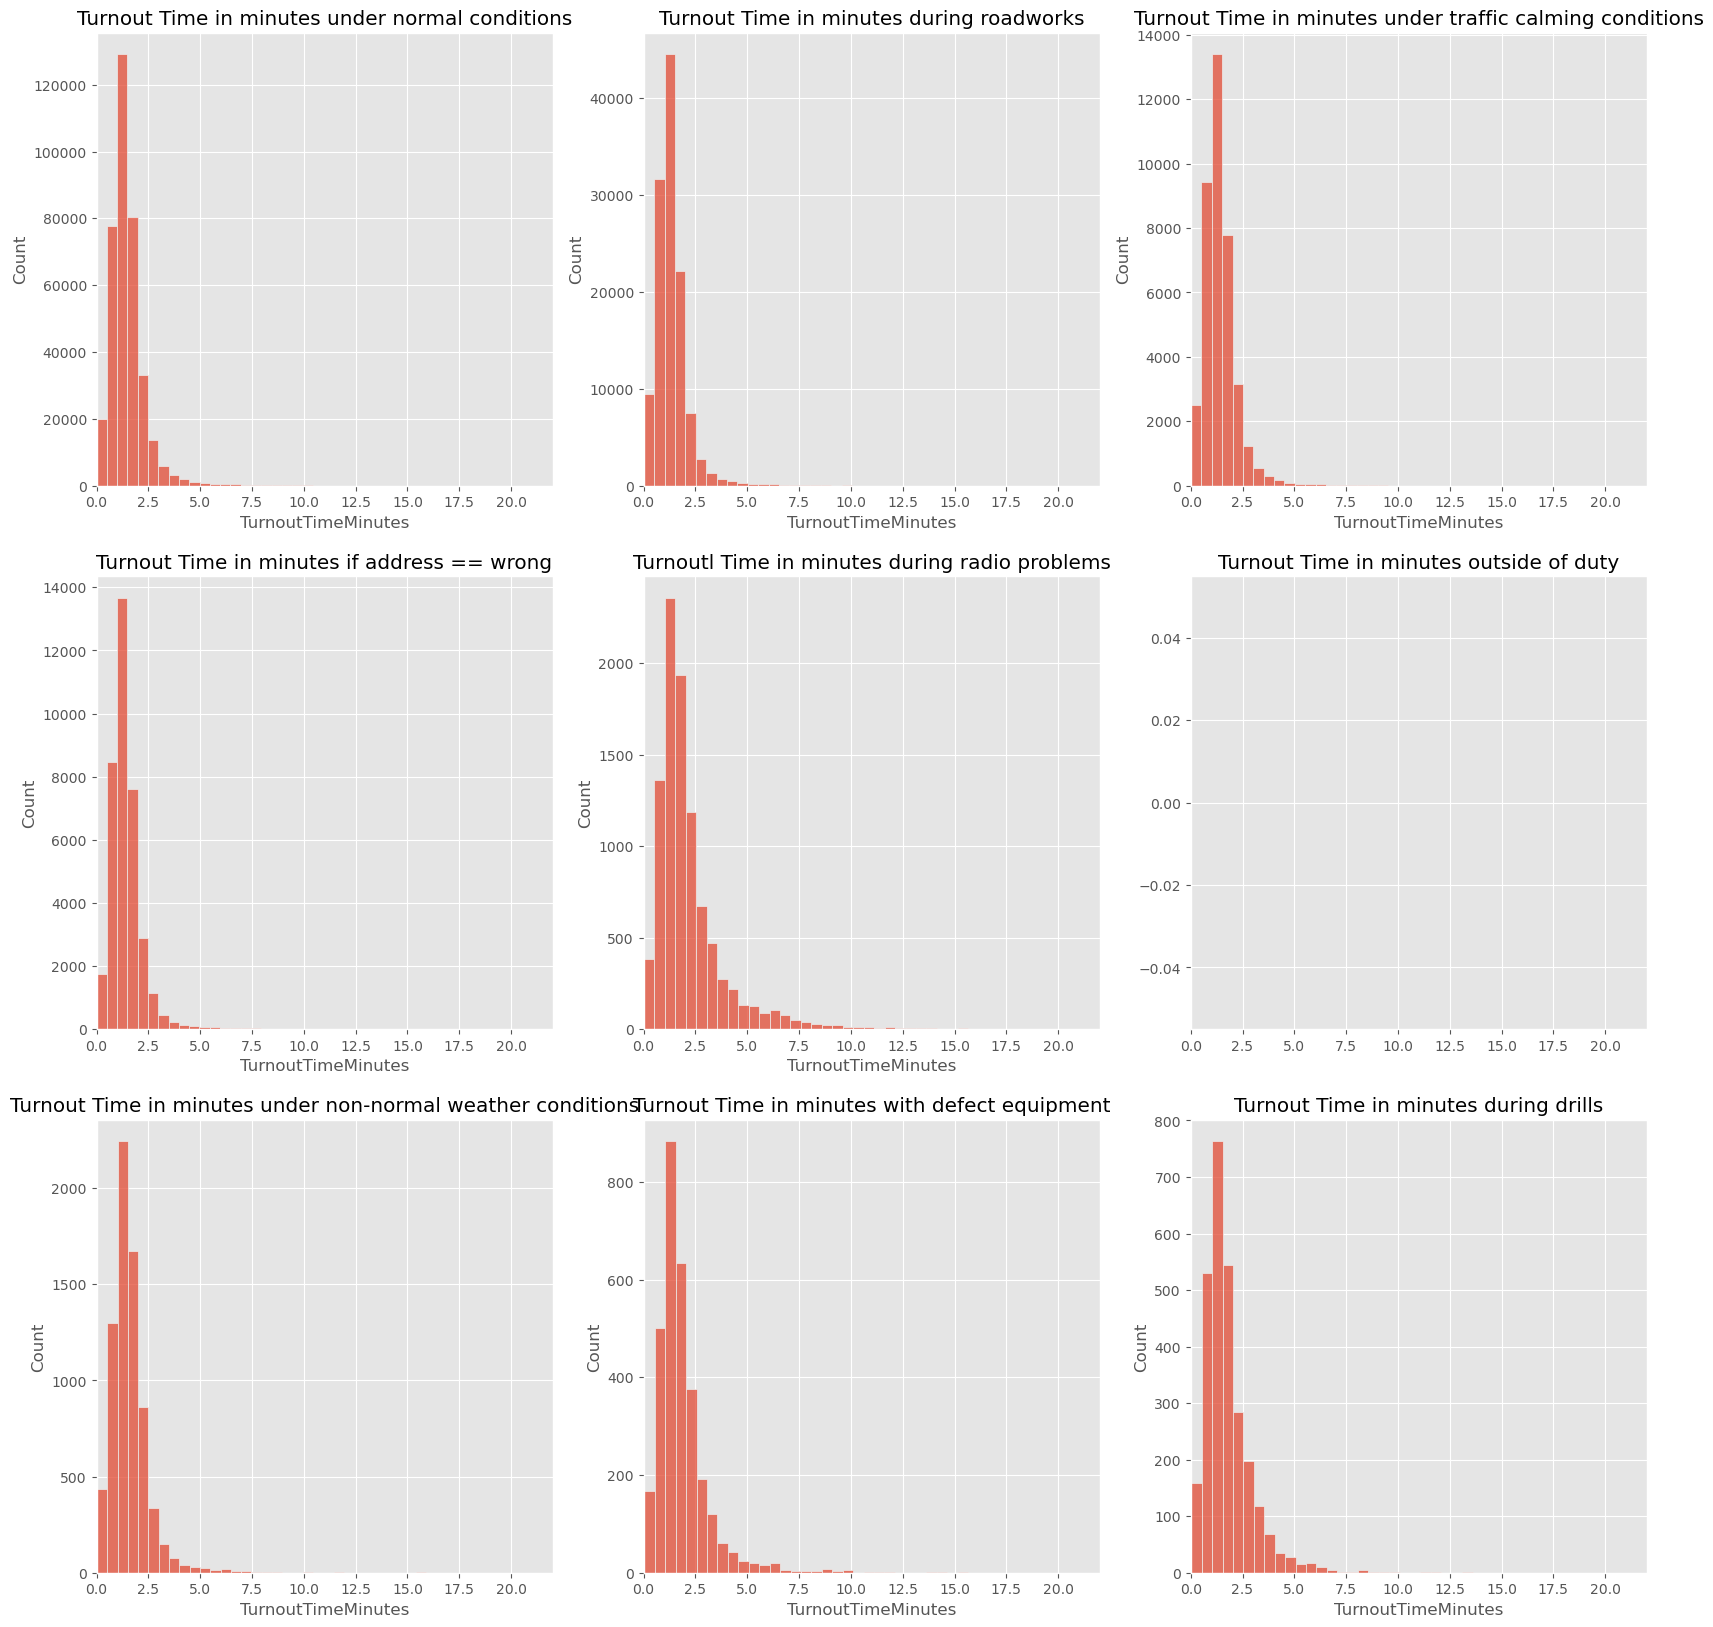

In [76]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.histplot(data=smooth['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes under normal conditions")
plt.subplot(332)
sns.histplot(data=roadworks['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes during roadworks")
plt.subplot(333)
sns.histplot(data=calming['TurnoutTimeMinutes'], binwidth = 0.5)
plt.title("Turnout Time in minutes under traffic calming conditions")
plt.xlim(0, 22)
plt.subplot(334)
sns.histplot(data=wrong_address['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes if address == wrong")
plt.subplot(335)
sns.histplot(data=radio['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnoutl Time in minutes during radio problems")
plt.subplot(336)
sns.histplot(data=outside_duty['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes outside of duty")
plt.subplot(337)
sns.histplot(data=weather['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes under non-normal weather conditions")
plt.subplot(338)
sns.histplot(data=equipment['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes with defect equipment")
plt.subplot(339)
sns.histplot(data=drills['TurnoutTimeMinutes'], binwidth = 0.5)
plt.xlim(0, 22)
plt.title("Turnout Time in minutes during drills")
plt.show(sns)

In [78]:
print(smooth['TurnoutTimeMinutes'].mean())
print(roadworks['TurnoutTimeMinutes'].mean())
print(calming['TurnoutTimeMinutes'].mean())
print(wrong_address['TurnoutTimeMinutes'].mean())
print(radio['TurnoutTimeMinutes'].mean())
print(outside_duty['TurnoutTimeMinutes'].mean())
print(weather['TurnoutTimeMinutes'].mean())
print(equipment['TurnoutTimeMinutes'].mean())
print(drills['TurnoutTimeMinutes'].mean())
#We tentatively suggest that equipment problems (incl. radio problems) and emergency calls during drills prolong the turnout time.

1.4696496837360113
1.3323167253540438
1.4298651375989875
1.4155252072292428
2.1860958311710776
nan
1.578860158554572
1.8536480224162086
1.7847844261316137


In [80]:
all_mobs.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes,TurnoutTimeMinutes
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,NaN,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.483333,4.216667
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,2.616667,2.516667
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.700000,1.800000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.983333,1.900000


In [82]:
all_mobs['Attendance_min']=all_mobs['AttendanceTimeSeconds']/60

In [84]:
Performance1=all_mobs[all_mobs['PerformanceReporting']=='1']
Performance2=all_mobs[all_mobs['PerformanceReporting']=='2']
print(Performance1.head())
print(Performance2.head())

  IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0      235138081     2009           0                   38426          H271   
2           2091     2009           0                   38429          A341   
3           3091     2009           0                   38430          G232   
4           5091     2009           0                   38432          A311   
6           6091     2009           0                   38434          A432   

  PerformanceReporting DateAndTimeMobilised DateAndTimeMobile  \
0                    1  2009-01-01 00:02:00               NaN   
2                    1  2009-01-01 00:04:00  01.01.2009 00:06   
3                    1  2009-01-01 00:04:00  01.01.2009 00:06   
4                    1  2009-01-01 00:06:00  01.01.2009 00:07   
6                    1  2009-01-01 00:06:00  01.01.2009 00:07   

  DateAndTimeArrived  TurnoutTimeSeconds  TravelTimeSeconds  \
0   01.01.2009 00:07                 NaN                NaN   
2   01.0

In [86]:
normalized_Performance1=Performance1['DelayCode_Description'].value_counts(normalize=True)
normalized_Performance2=Performance2['DelayCode_Description'].value_counts(normalize=True)
print(normalized_Performance1, normalized_Performance2)

DelayCode_Description
Not held up                           0.593835
Traffic, roadworks, etc               0.195956
Traffic calming measures              0.063544
Address incomplete/wrong              0.061659
Arrived but held up - Other reason    0.030833
Mob/Radio problems when mobilised     0.016321
On outside duty when mobilised        0.015574
Weather conditions                    0.012429
Appliance/Equipment defect            0.005002
At drills when mobilised              0.004849
Name: proportion, dtype: float64 DelayCode_Description
Not held up                           0.612842
Traffic, roadworks, etc               0.195249
Traffic calming measures              0.060699
Address incomplete/wrong              0.051197
Arrived but held up - Other reason    0.033718
Mob/Radio problems when mobilised     0.015024
On outside duty when mobilised        0.013649
Weather conditions                    0.009056
Appliance/Equipment defect            0.005248
At drills when mobilised      

In [88]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
data1= Performance1['TurnoutTimeMinutes']
data2= Performance2['TurnoutTimeMinutes']
data1_tot_clean=data1.dropna()
data2_tot_clean=data2.dropna()       
print(data1_tot_clean.isna().sum())
print(data2_tot_clean.isna().sum())
print(data1_tot_clean.info())
print(data2_tot_clean.info())

stat, p_value = mannwhitneyu(data1_tot_clean, data2_tot_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")



0
0
<class 'pandas.core.series.Series'>
Index: 1632842 entries, 2 to 711370
Series name: TurnoutTimeMinutes
Non-Null Count    Dtype  
--------------    -----  
1632842 non-null  float64
dtypes: float64(1)
memory usage: 24.9 MB
None
<class 'pandas.core.series.Series'>
Index: 634164 entries, 1 to 711369
Series name: TurnoutTimeMinutes
Non-Null Count   Dtype  
--------------   -----  
634164 non-null  float64
dtypes: float64(1)
memory usage: 9.7 MB
None
Test Statistic: 473105731924.0
P-value: 0.0


In [90]:
data1_travel= Performance1['TravelTimeMinutes']
data2_travel= Performance2['TravelTimeMinutes']
data1_travel_clean=data1_travel.dropna()
data2_travel_clean=data2_travel.dropna()       
print(data1_travel_clean.isna().sum())
print(data2_travel_clean.isna().sum())
print(data1_travel_clean.info())
print(data2_travel_clean.info())

stat, p_value = mannwhitneyu(data1_travel_clean, data2_travel_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

0
0
<class 'pandas.core.series.Series'>
Index: 1632755 entries, 2 to 711370
Series name: TravelTimeMinutes
Non-Null Count    Dtype  
--------------    -----  
1632755 non-null  float64
dtypes: float64(1)
memory usage: 24.9 MB
None
<class 'pandas.core.series.Series'>
Index: 634158 entries, 1 to 711369
Series name: TravelTimeMinutes
Non-Null Count   Dtype  
--------------   -----  
634158 non-null  float64
dtypes: float64(1)
memory usage: 9.7 MB
None
Test Statistic: 362010367716.0
P-value: 0.0


In [92]:
data1_attendance= Performance1['Attendance_min']
data2_attendance= Performance2['Attendance_min']
data1_attendance_clean=data1_attendance.dropna()
data2_attendance_clean=data2_attendance.dropna()       
print(data1_attendance_clean.isna().sum())
print(data2_attendance_clean.isna().sum())
print(data1_attendance_clean.info())
print(data2_attendance_clean.info())

stat, p_value = mannwhitneyu(data1_attendance_clean, data2_attendance_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

0
0
<class 'pandas.core.series.Series'>
Index: 1654973 entries, 0 to 711370
Series name: Attendance_min
Non-Null Count    Dtype  
--------------    -----  
1654973 non-null  float64
dtypes: float64(1)
memory usage: 25.3 MB
None
<class 'pandas.core.series.Series'>
Index: 639473 entries, 1 to 711369
Series name: Attendance_min
Non-Null Count   Dtype  
--------------   -----  
639473 non-null  float64
dtypes: float64(1)
memory usage: 9.8 MB
None
Test Statistic: 353102859649.0
P-value: 0.0


In [94]:
all_mobs_tot_zero=all_mobs[all_mobs['TurnoutTimeSeconds']==0]
all_mobs_tot_zero.head(20)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes,TurnoutTimeMinutes,Attendance_min
239423,132389-29092016,2016,20,4778899,E252,1,2016-09-29 19:54:00,29.09.2016 19:54,29.09.2016 19:54,0.0,22.0,22,29.09.2016 19:59,NaN,E25,Plumstead,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,9,29,0.366667,0.0,0.366667
260800,158024-20112016,2016,13,4810104,G272,1,2016-11-20 13:54:00,20.11.2016 13:54,20.11.2016 13:58,0.0,266.0,266,20.11.2016 14:08,NaN,G27,North Kensington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Sunday,11,20,4.433333,0.0,4.433333
298255,024944-28022017,2017,8,4866277,F362,Not Used,2017-02-28 08:11:00,28.02.2017 08:11,28.02.2017 08:28,0.0,1005.0,1005,28.02.2017 08:39,NaN,F36,Walthamstow,Home Station,3,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Tuesday,2,28,16.750000,0.0,16.750000
313343,043750-10042017,2017,9,4888288,A331,1,2017-10-04 08:14:00,10.04.2017 08:14,10.04.2017 08:15,0.0,36.0,36,10.04.2017 08:38,NaN,A33,Tottenham,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Wednesday,10,4,0.600000,0.0,0.600000
385805,131865-30092017,2017,18,4997463,F251,2,2017-09-30 17:53:00,30.09.2017 17:53,30.09.2017 17:53,0.0,2.0,2,30.09.2017 17:56,NaN,F25,Shadwell,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Saturday,9,30,0.033333,0.0,0.033333
404870,153343-14112017,2017,8,5025839,G261,2,2017-11-14 08:44:00,14.11.2017 08:44,14.11.2017 08:46,0.0,86.0,86,14.11.2017 08:48,NaN,G26,Acton,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Tuesday,11,14,1.433333,0.0,1.433333
459895,039197-30032018,2018,11,5107674,F321,1,2018-03-30 10:29:00,30.03.2018 10:29,30.03.2018 10:32,0.0,147.0,147,30.03.2018 10:51,NaN,F32,Stoke Newington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Friday,3,30,2.450000,0.0,2.450000
482102,064767-24052018,2018,22,5141849,F381,1,2018-05-24 21:16:00,24.05.2018 21:16,24.05.2018 21:19,0.0,146.0,146,24.05.2018 21:19,NaN,F38,Romford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,5,24,2.433333,0.0,2.433333
602420,026796-05032019,2019,12,5333558,F441,1,2019-05-03 12:18:00,05.03.2019 12:18,05.03.2019 12:20,0.0,122.0,122,05.03.2019 13:42,NaN,F44,East Ham,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Friday,5,3,2.033333,0.0,2.033333
631956,060925-17052019,2019,19,5380021,G281,1,2019-05-17 18:31:00,17.05.2019 18:31,17.05.2019 18:36,0.0,317.0,317,17.05.2019 18:52,NaN,G28,Willesden,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Friday,5,17,5.283333,0.0,5.283333


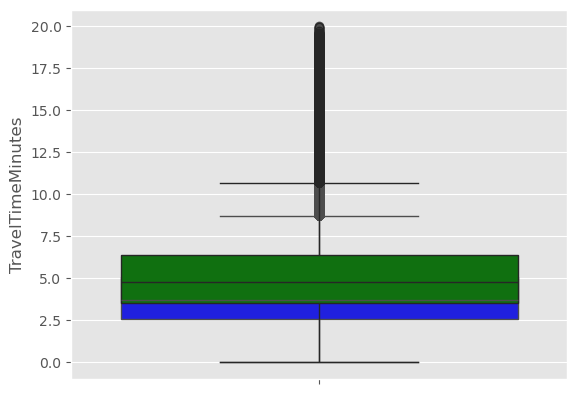

Test Statistic: 362010367716.0
P-value: 0.0


In [96]:
sns.boxplot(data1_travel_clean, color = 'blue')
sns.boxplot(data2_travel_clean, color = 'green')
plt.show(sns)

stat, p_value = mannwhitneyu(data1_travel_clean, data2_travel_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")


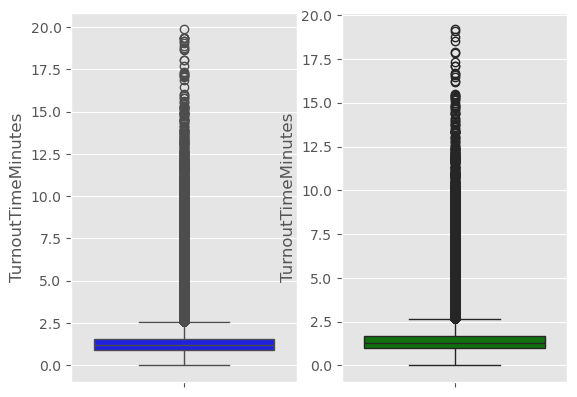

Test Statistic: 473105731924.0
P-value: 0.0


In [99]:
plt.subplot(1,2,1)
sns.boxplot(data1_tot_clean, color = 'blue')
plt.subplot(1,2,2)
sns.boxplot(data2_tot_clean, color = 'green')
plt.show(sns)

stat, p_value = mannwhitneyu(data1_tot_clean, data2_tot_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

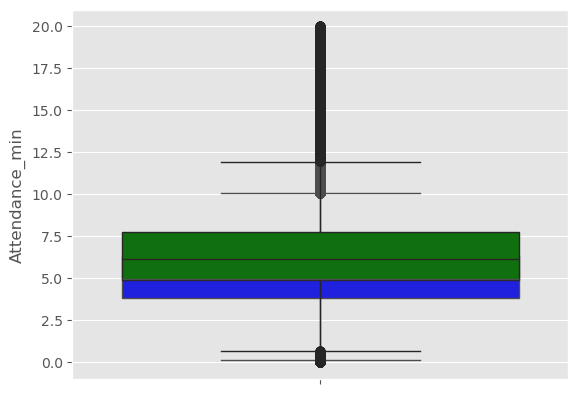

Test Statistic: 353102859649.0
P-value: 0.0


In [100]:
sns.boxplot(data1_attendance_clean, color = 'blue')
sns.boxplot(data2_attendance_clean, color = 'green')
plt.show(sns)

stat, p_value = mannwhitneyu(data1_attendance_clean, data2_attendance_clean)
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

In [103]:
#Slicing of dataframe according to Delay code description
roadworks=all_mobs[all_mobs['DelayCode_Description']=='Traffic, roadworks, etc']
calming=all_mobs[all_mobs['DelayCode_Description']=='Traffic calming measures']
wrong_address=all_mobs[all_mobs['DelayCode_Description']=='Address incomplete/wrong']
smooth=all_mobs[all_mobs['DelayCode_Description']=='Not held up']
radio=all_mobs[all_mobs['DelayCode_Description']=='Mob/Radio problems when mobilised']
outside_duty=all_mobs[all_mobs['DelayCode_Description']=='on outside duty when mobilised']
weather=all_mobs[all_mobs['DelayCode_Description']=='Weather conditions']
equipment=all_mobs[all_mobs['DelayCode_Description']=='Appliance/Equipment defect']
drills=all_mobs[all_mobs['DelayCode_Description']=='At drills when mobilised']

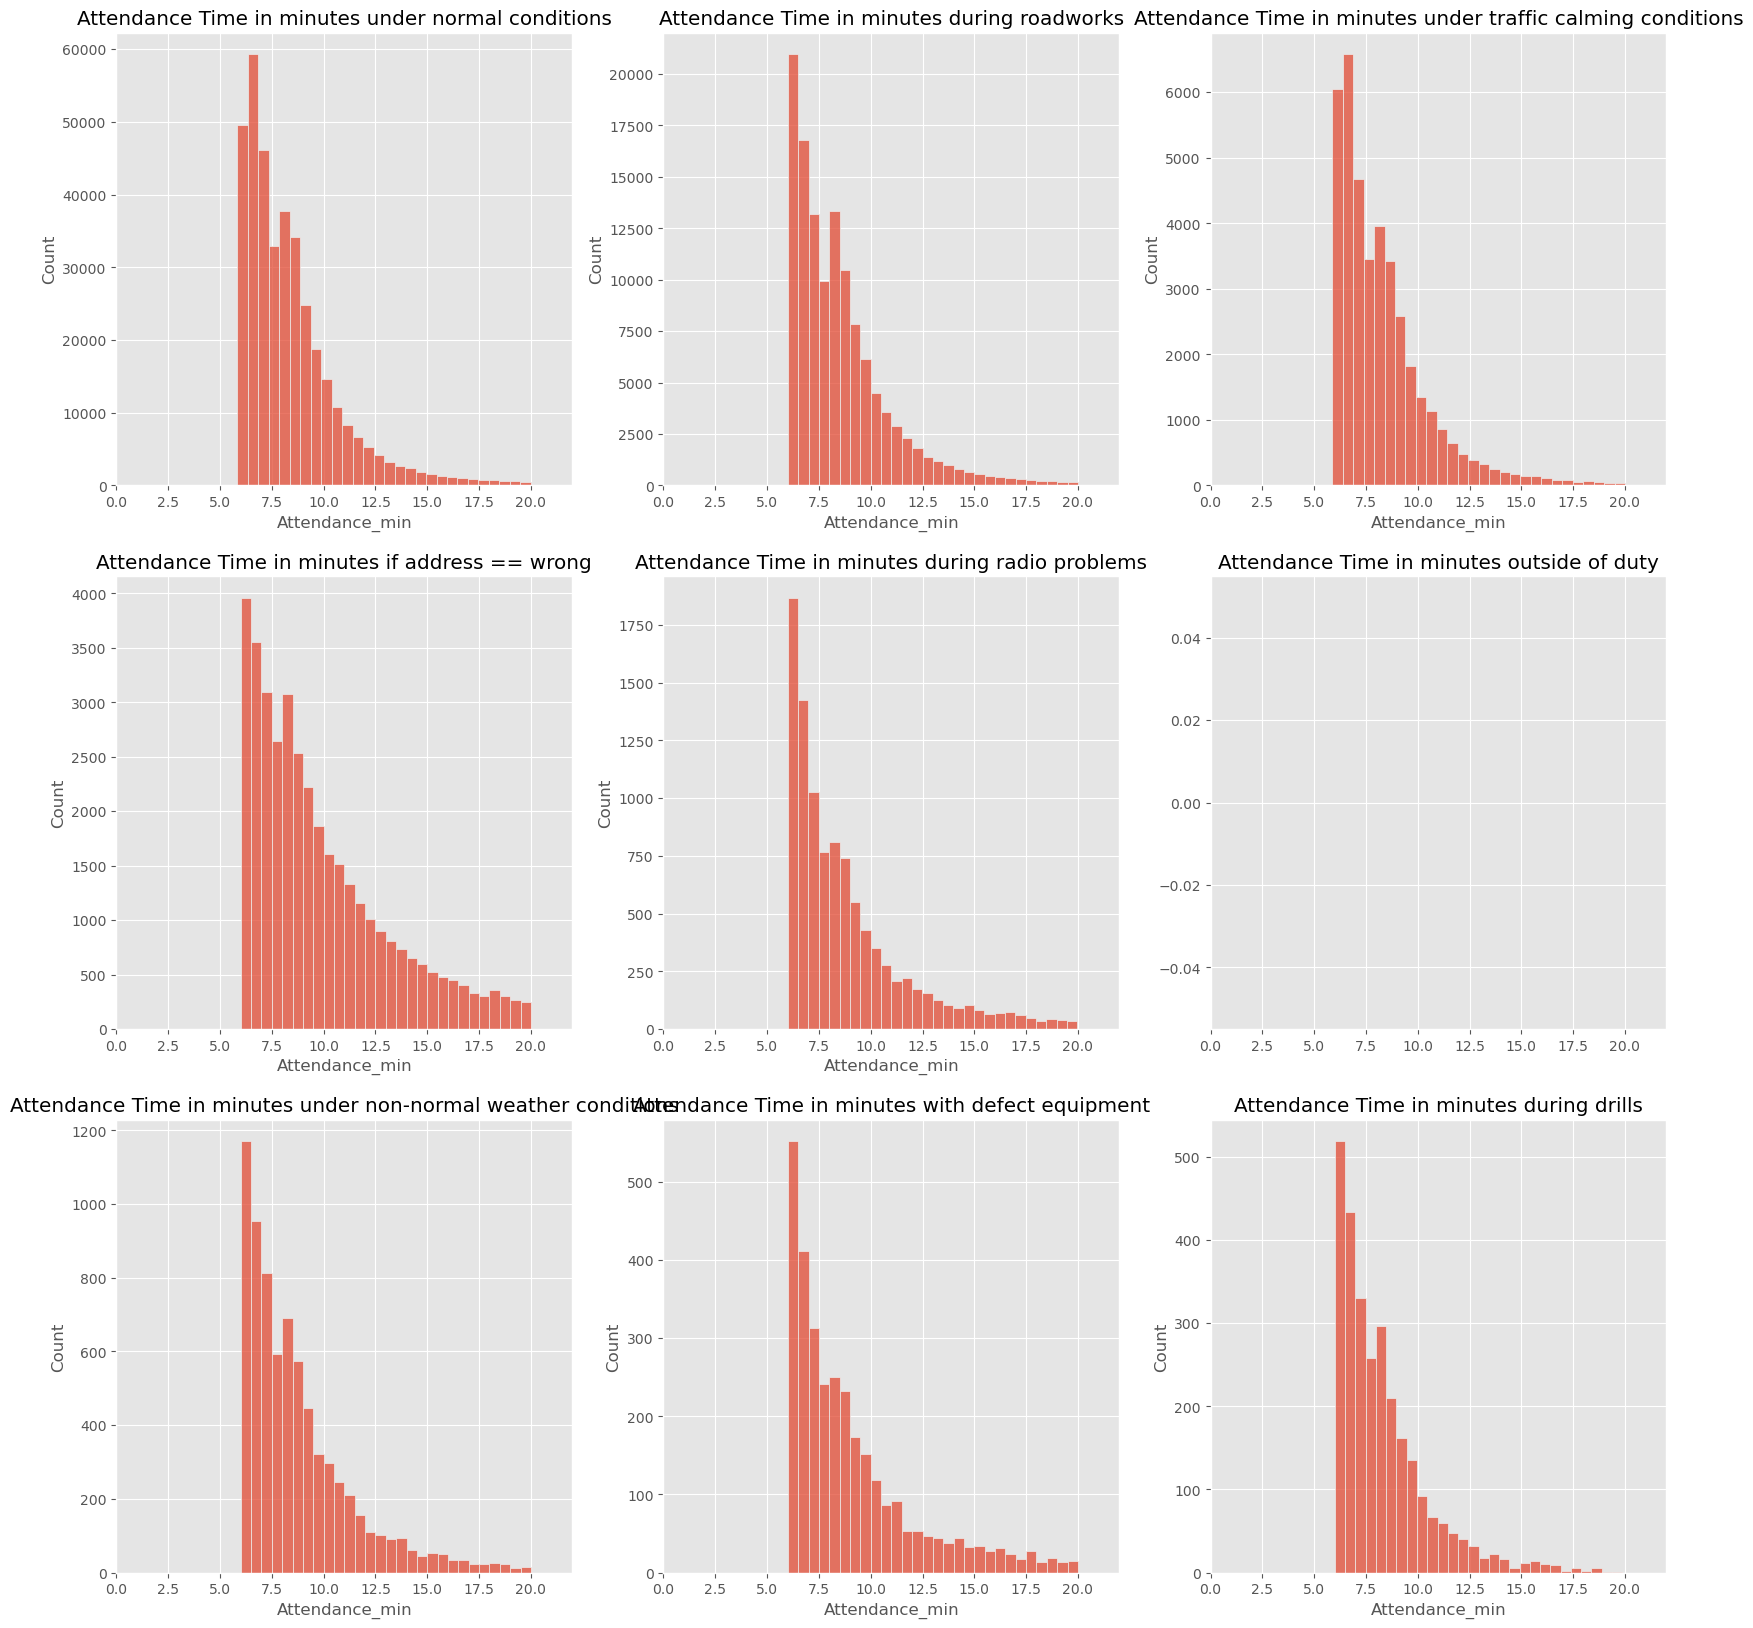

In [105]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.histplot(data=smooth['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes under normal conditions")
plt.xlim(0, 22)
plt.subplot(332)
sns.histplot(data=roadworks['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes during roadworks")
plt.xlim(0, 22)
plt.subplot(333)
sns.histplot(data=calming['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes under traffic calming conditions")
plt.xlim(0, 22)
plt.subplot(334)
sns.histplot(data=wrong_address['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes if address == wrong")
plt.xlim(0, 22)
plt.subplot(335)
sns.histplot(data=radio['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes during radio problems")
plt.xlim(0, 22)
plt.subplot(336)
sns.histplot(data=outside_duty['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes outside of duty")
plt.xlim(0, 22)
plt.subplot(337)
sns.histplot(data=weather['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes under non-normal weather conditions")
plt.xlim(0, 22)
plt.subplot(338)
sns.histplot(data=equipment['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes with defect equipment")
plt.xlim(0, 22)
plt.subplot(339)
sns.histplot(data=drills['Attendance_min'], binwidth = 0.5)
plt.title("Attendance Time in minutes during drills")
plt.xlim(0, 22)
plt.show(sns)

In [107]:
print(smooth['Attendance_min'].mean())
print(roadworks['Attendance_min'].mean())
print(calming['Attendance_min'].mean())
print(wrong_address['Attendance_min'].mean())
print(radio['Attendance_min'].mean())
print(outside_duty['Attendance_min'].mean())
print(weather['Attendance_min'].mean())
print(equipment['Attendance_min'].mean())
print(drills['Attendance_min'].mean())
#We tentatively suggest that calls during drills, radio/equipments problems delay the arrival at the duty area. 
#The most importat delay factor is the pass of a wrong address.

8.387614227282084
8.499976761098626
8.27130218307162
9.87081437958049
8.811809380737772
nan
8.750385303426448
9.051273111463285
8.280860675225867


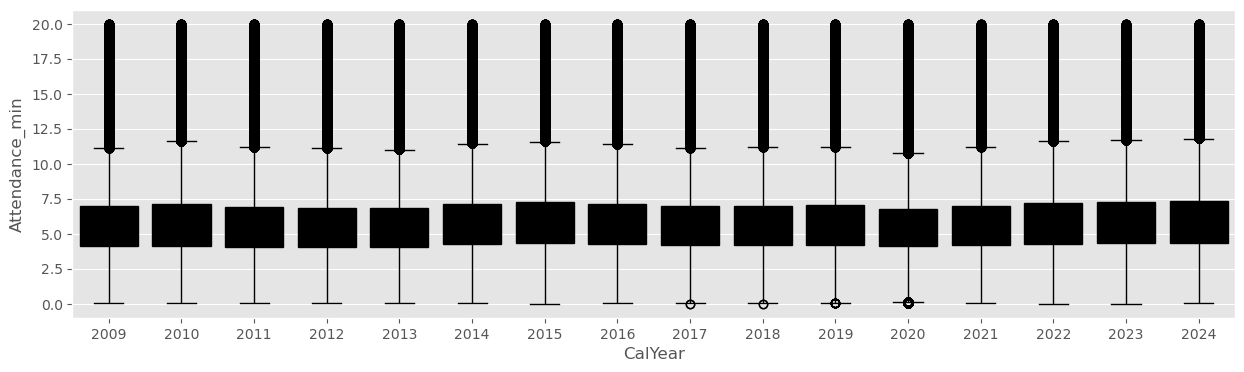

In [109]:
#This plot takes forever to load... maybe it's faster on your computers.
plt.figure(figsize=(15,4))
sns.boxplot(data=all_mobs, x='CalYear', y='Attendance_min', color='black')
plt.show(sns)

In [110]:
all_mobs.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,BoroughName,WardName,Weekday,Month,Day,TravelTimeMinutes,TurnoutTimeMinutes,Attendance_min
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,01.01.2009 00:07,NaN,NaN,319,01.01.2009 00:16,01.01.2009 00:23,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,NaN,NaN,5.316667
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,01.01.2009 00:06,01.01.2009 00:08,253.0,89.0,342,01.01.2009 00:12,01.01.2009 00:12,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.483333,4.216667,5.700000
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:09,151.0,157.0,308,01.01.2009 00:16,01.01.2009 00:17,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,2.616667,2.516667,5.133333
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,01.01.2009 00:06,01.01.2009 00:08,108.0,102.0,210,01.01.2009 00:20,01.01.2009 00:20,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.700000,1.800000,3.500000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,01.01.2009 00:07,01.01.2009 00:09,114.0,119.0,233,01.01.2009 00:11,01.01.2009 00:22,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,NaN,NaN,Thursday,1,1,1.983333,1.900000,3.883333


In [111]:
num_var=all_mobs[['CalYear', 'HourOfCall', 'PerformanceReporting', 'PumpOrder', 'Attendance_min']]

In [115]:
num_var5=all_mobs[['PerformanceReporting', 'PumpOrder', 'Attendance_min']]

In [117]:
num_var.head()

,CalYear,HourOfCall,PerformanceReporting,PumpOrder,Attendance_min
0,2009,0,1,1,5.316667
1,2009,0,2,2,5.700000
2,2009,0,1,1,5.133333
3,2009,0,1,1,3.500000
4,2009,0,1,1,3.883333


In [119]:
num_var2 = all_mobs[['TurnoutTimeMinutes']]

In [121]:
num_var3= pd.concat([num_var, num_var2], axis=1) 

In [123]:
num_var6= pd.concat([num_var5, num_var2], axis=1) 

In [125]:
num_var3.head()

,CalYear,HourOfCall,PerformanceReporting,PumpOrder,Attendance_min,TurnoutTimeMinutes
0,2009,0,1,1,5.316667,NaN
1,2009,0,2,2,5.700000,4.216667
2,2009,0,1,1,5.133333,2.516667
3,2009,0,1,1,3.500000,1.800000
4,2009,0,1,1,3.883333,1.900000


In [127]:
num_var4= all_mobs['TravelTimeMinutes']

In [129]:
num_var_final= pd.concat([num_var3, num_var4], axis=1)

In [131]:
num_var_final2= pd.concat([num_var6, num_var4], axis=1)

In [133]:
num_var_final2.head()

,PerformanceReporting,PumpOrder,Attendance_min,TurnoutTimeMinutes,TravelTimeMinutes
0,1,1,5.316667,NaN,NaN
1,2,2,5.700000,4.216667,1.483333
2,1,1,5.133333,2.516667,2.616667
3,1,1,3.500000,1.800000,1.700000
4,1,1,3.883333,1.900000,1.983333


In [135]:
num_var_final.head()

,CalYear,HourOfCall,PerformanceReporting,PumpOrder,Attendance_min,TurnoutTimeMinutes,TravelTimeMinutes
0,2009,0,1,1,5.316667,NaN,NaN
1,2009,0,2,2,5.700000,4.216667,1.483333
2,2009,0,1,1,5.133333,2.516667,2.616667
3,2009,0,1,1,3.500000,1.800000,1.700000
4,2009,0,1,1,3.883333,1.900000,1.983333


In [137]:
num_var_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496800 entries, 0 to 711370
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CalYear               int64  
 1   HourOfCall            int64  
 2   PerformanceReporting  object 
 3   PumpOrder             int64  
 4   Attendance_min        float64
 5   TurnoutTimeMinutes    float64
 6   TravelTimeMinutes     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 152.4+ MB


In [139]:
num_var_final.isna().sum()

CalYear                     0
HourOfCall                  0
PerformanceReporting        0
PumpOrder                   0
Attendance_min              0
TurnoutTimeMinutes      28596
TravelTimeMinutes       28691
dtype: int64

In [141]:
num_var_final['PerformanceReporting'].value_counts().sort_index()

PerformanceReporting
1           1654973
2            639473
Not Used     202354
Name: count, dtype: int64

In [143]:
num_var_final['PerformanceReporting'].replace('Not Used', 1, inplace=True)

C:\Users\Thesa\AppData\Local\Temp\ipykernel_18680\2018796077.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [145]:
num_var_final2['PerformanceReporting'].replace('Not Used', 1, inplace=True)

C:\Users\Thesa\AppData\Local\Temp\ipykernel_18680\774118796.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





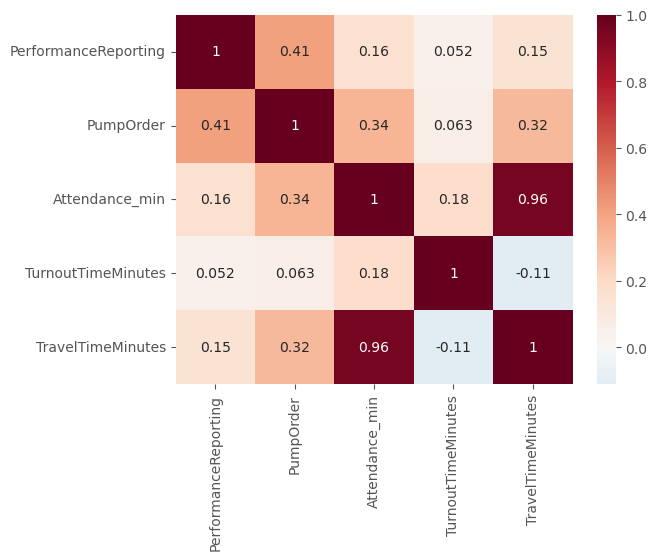

In [147]:
sns.heatmap=sns.heatmap(num_var_final2.corr(), annot=True, cmap="RdBu_r", center =0)
plt.show(sns)

In [149]:
sns.heatmap(num_var_final.corr(), annot=True, cmap="RdBu_r", center =0)
plt.show(sns)

TypeError: 'Axes' object is not callable